# Lecture : Graph Clustering

## Lab 06 : Louvain Algorithm 

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML2023_codes/codes/03_Graph_Clustering'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    !pip install python-louvain==0.15 # install louvain
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
import sys; sys.path.insert(0, 'lib/')
%load_ext autoreload
%autoreload 2
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_kernel_kmeans_spectral
from lib.utils import compute_purity
from lib.utils import construct_knn_graph
from lib.utils import compute_ncut
from lib.utils import compute_pcut
from lib.utils import graph_laplacian
import warnings; warnings.filterwarnings("ignore")
import community # Louvain algorithm
import networkx as nx


# Two-moon dataset

n,d,nc: 2000 2 2


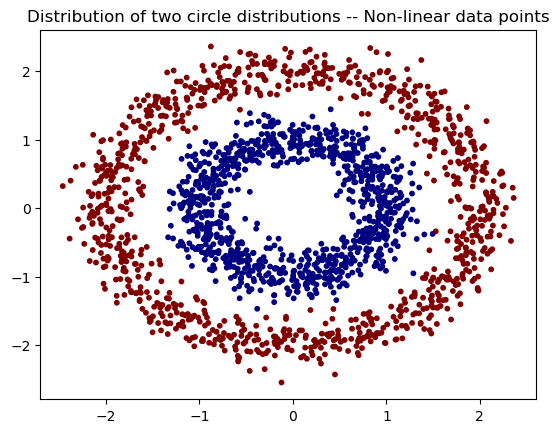

In [3]:
# Load two-circle dataset
mat = scipy.io.loadmat('datasets/two_circles.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print('n,d,nc:',n,d,nc)

plt.figure(1)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cgt, cmap='jet')
plt.title('Distribution of two circle distributions -- Non-linear data points')
plt.show()


k-NN graph with Zelnik-Perona technique
nb_data: 2000 , nb_clusters= 14
accuracy_louvain= 99.7  with nb_clusters= 14


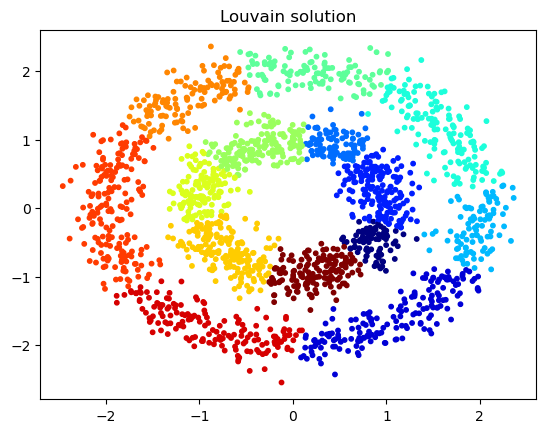

In [4]:
# Run Louvain algorithm
W = construct_knn_graph(X, 50, 'euclidean_zelnik_perona')
Wnx = nx.from_numpy_array(W)
partition = community.best_partition(Wnx)
nc_louvain = len(np.unique( [partition[nodes] for nodes in partition.keys()] ))
n = len(Wnx.nodes())
print('nb_data:', n , ', nb_clusters=', nc_louvain)

# Extract clusters
Clouv = np.zeros([n])
clusters = []
k = 0
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    Clouv[list_nodes] = k
    k += 1
    clusters.append(list_nodes)
    
# Accuracy
acc = compute_purity(Clouv,Cgt,nc_louvain)
print('accuracy_louvain=',acc,' with nb_clusters=',nc_louvain)

plt.figure(2)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Clouv, cmap='jet')
plt.title('Louvain solution')
plt.show()


# USPS dataset

In [5]:
# Load USPS dataset
mat = scipy.io.loadmat('datasets/USPS.mat')
W = mat['W']
n = W.shape[0]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print('n,nc:',n,nc)


n,nc: 9298 10


In [6]:
# Random partitionning
Crand = np.random.randint(0,nc,[n])
acc = compute_purity(Crand,Cgt,nc)
print('Random solution:', str(acc)[:5])

# Run NCut
Cncut, acc = compute_ncut(W,Cgt,nc) 
print('NCut solution:', str(acc)[:5])


Random solution: 16.70
NCut solution: 73.52


In [7]:
# Run Louvain
Wnx = nx.from_numpy_array(W.toarray())
partition = community.best_partition(Wnx)
nc_louvain = len(np.unique( [partition[nodes] for nodes in partition.keys()] ))
n = len(Wnx.nodes())
print('nb_data:', n , ', nb_clusters=', nc_louvain)

# Extract clusters
Clouv = np.zeros([n])
clusters = []
k = 0
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    Clouv[list_nodes] = k
    k += 1
    clusters.append(list_nodes)
    
# Accuracy
acc = compute_purity(Clouv,Cgt,nc_louvain)
print('Louvain solution ',str(acc)[:5],' with nb_clusters=',nc_louvain)


nb_data: 9298 , nb_clusters= 14
Louvain solution  96.06  with nb_clusters= 14


In [8]:
# Run NCut with the number of clusters found by Louvain
Cncut, acc = compute_ncut(W,Cgt,nc_louvain)
print('NCut solution:',str(acc)[:5],' with nb_clusters=',nc_louvain)


NCut solution: 86.68  with nb_clusters= 14
